# **Project Name**    -Credit Card Default Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Project Summary -**

**We are going to predict the Customers' Default Payment. We have been given
Dataset of past payment history With the details of customers like age, gender,merrige status, education and credit limit etc .There are few duplicate value after removing we checked for missing value , there are no missing value present. Doing some EDA to get the relationship of different features with some visualiazation. Feature Engineering Like Handling Outliers , Discrete Feature Encoding, Data Transformation ,  Data Scaling , Dimentionlity Reduction , Data Spliting with finally Handling Imbalanced Data etc. For outlier detection we have used Isolation Forest algorithum technique , we got near about 300 datapoint which contain outlier value , we just removed these datapoint. After that we checked for discrete Feature, those feature which have less than 20 unique value we encode them using onehotencoder and convert them new features. Next in Data Transformation we take continuous feature value and transform them into more symmetric values . In data scaling we scaled the data on one scale between 0 and 1. we used PCA for dimentionlity reduction . After spliting the data in Train and Test we handel the Imbalaced Data . We use SMOTE techinique  for synthesis minority class.  Now We have Trained different Classification module like we started with simple one Logistic Regression than moved to Random Forest , XGBOOST , and final SVM and checked the Score for all model with training and testing data . We found XGBOOST as the Best module according to differnt score . XGBOOST was better of all module according to acuracy , precision ,recall, F1 and ROC-AUC score . Now we predict the Output probablity using the XGBOOST for class 1 . We prepare the K-S Chart using this Data . We got 80.5 for 3rd decile.**

# **GitHub Link -**

https://github.com/sus4157d/almabetter.git

# **Problem Statement**


**We are required to predict the Case of Customers' Default Payments.**

# ***Let's Begin !***

## ***1. Knowing our Data***

### Importing Libraries

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np
import re
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
#scaling the data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import IsolationForest
#machine learning
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#for hyperparameter tunning and cross velidation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
#Function Transformation
from sklearn.preprocessing import FunctionTransformer
#imbalance reduction of classes
from imblearn.over_sampling import SMOTE
# for dimensionlity reduction
from sklearn.decomposition import PCA
#lyb for evaluation of model
from sklearn.metrics import accuracy_score,roc_auc_score,log_loss
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
#lyb for understanding model perdiction
import glob

In [ ]:
pip install colorama

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
df=pd.read_excel("/content/drive/MyDrive/default_of_creditcard_clients.xls")

In [ ]:
#Setting columns for first View
columns=list(df.iloc[0])
df.columns=columns
df.drop(0,axis=0,inplace=True)
df['DV']=df['default payment next month']
df.drop('default payment next month',axis=1,inplace=True)
df.set_index('ID',inplace=True)
df=df.astype('int')
pd.set_option('display.max_columns', 200)

###First View of DataSet

In [ ]:
# Dataset First Look
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DV
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(30000, 24)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_0      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

#### Checking for Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

35

In [ ]:
# Removing Duplicate values keeping the last
df.drop_duplicates(keep='last',inplace=True)

#### No Missing Values OR Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DV           0
dtype: int64

### Description of dataset

We have given the DataSet of 30000 . Independent Variable Credit Limit , Gender , Age , Education and Merrige status  of Customer . Most of which are Continuous variable . We have also given History of past payments , Amount of bill payment and Previous amount paid along with Dependent Variable Which is Classification of these Customers as Default or not.

## ***2. Understanding Your Variables***

In [ ]:
#creathing a copy of dataframe
dfn=df.copy()

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  LIMIT_BAL is 81 .
No. of unique values in  SEX is 2 .
No. of unique values in  EDUCATION is 7 .
No. of unique values in  MARRIAGE is 4 .
No. of unique values in  AGE is 56 .
No. of unique values in  PAY_0 is 11 .
No. of unique values in  PAY_2 is 11 .
No. of unique values in  PAY_3 is 11 .
No. of unique values in  PAY_4 is 11 .
No. of unique values in  PAY_5 is 10 .
No. of unique values in  PAY_6 is 10 .
No. of unique values in  BILL_AMT1 is 22723 .
No. of unique values in  BILL_AMT2 is 22346 .
No. of unique values in  BILL_AMT3 is 22026 .
No. of unique values in  BILL_AMT4 is 21548 .
No. of unique values in  BILL_AMT5 is 21010 .
No. of unique values in  BILL_AMT6 is 20604 .
No. of unique values in  PAY_AMT1 is 7943 .
No. of unique values in  PAY_AMT2 is 7899 .
No. of unique values in  PAY_AMT3 is 7518 .
No. of unique values in  PAY_AMT4 is 6937 .
No. of unique values in  PAY_AMT5 is 6897 .
No. of unique values in  PAY_AMT6 is 6939 .
No. of unique values in  DV

In [ ]:
# Deviding the variable in discreate and continuous category and ploting the unique value and distribution plot
cont_var=[]
dis_var=[]
for col in df.columns:
  lent=len(df[col].unique())
  if lent>20:
    cont_var.append(col)
  else:
    dis_var.append(col)


Dividing the Features into Discreate and Continuous Features . Feature which have unique values less then 20  are Discrete and other as Continuous Feature.

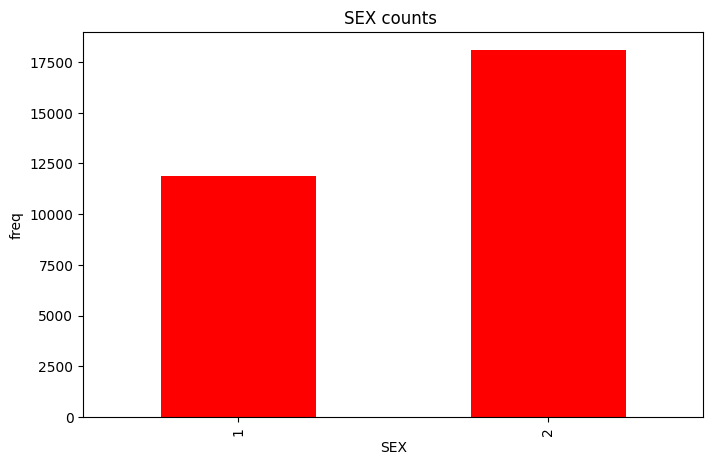

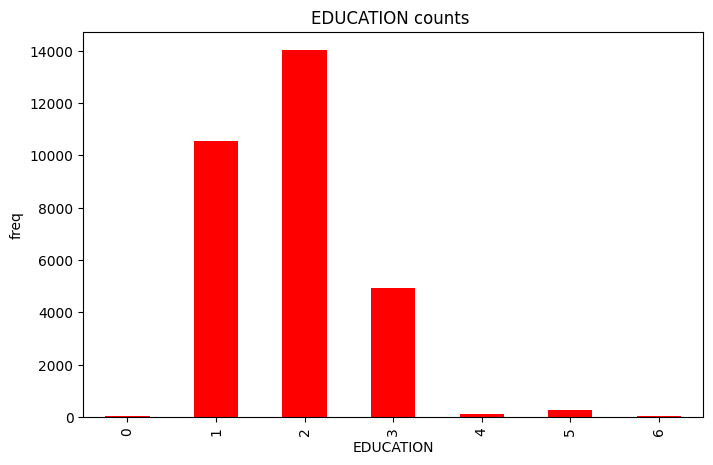

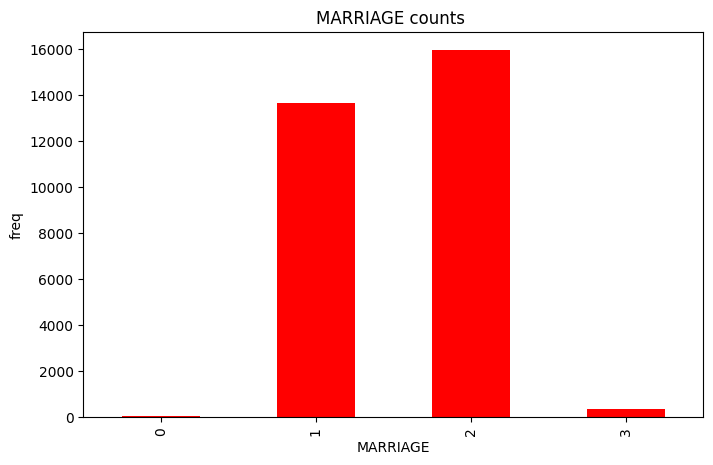

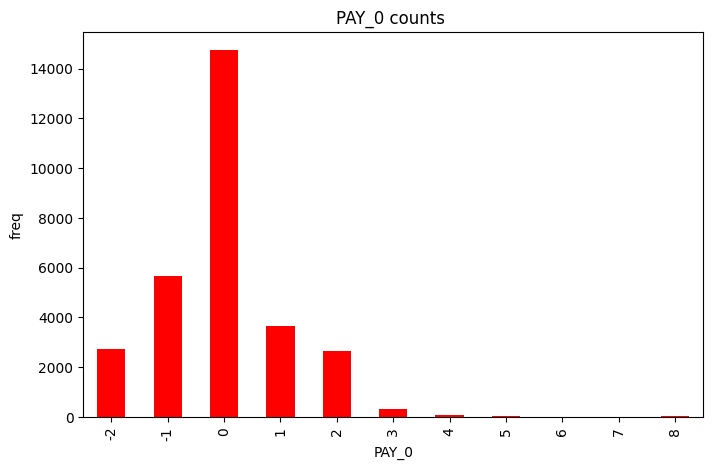

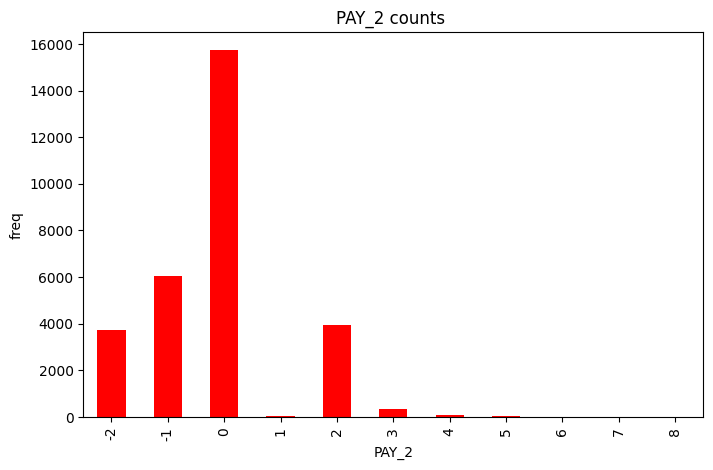

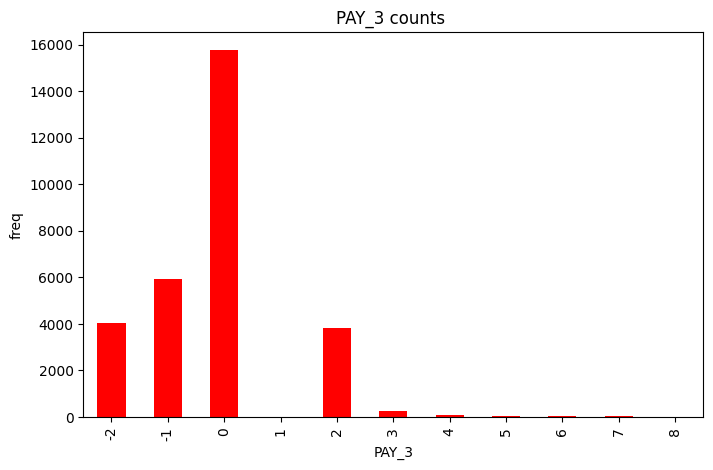

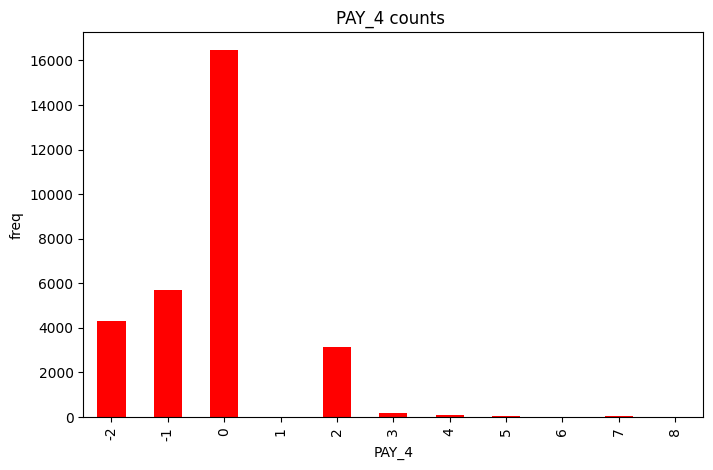

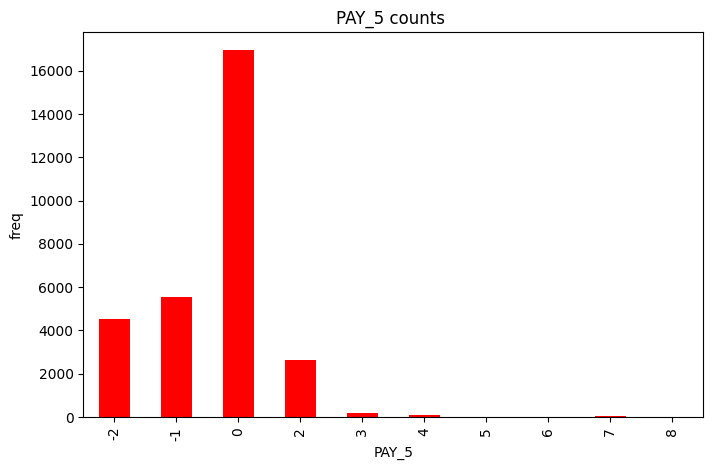

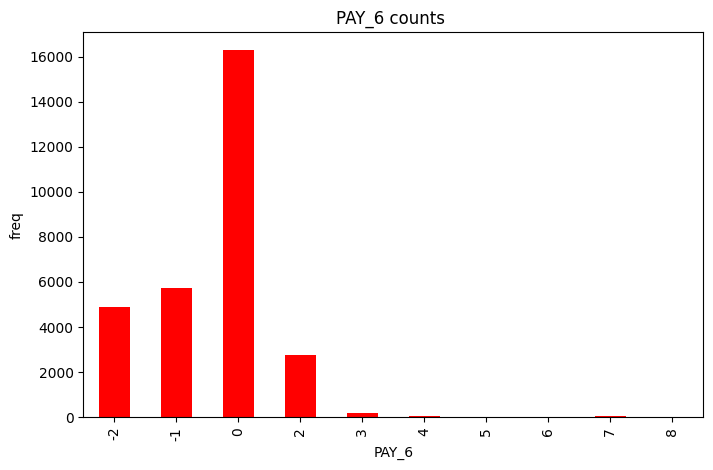

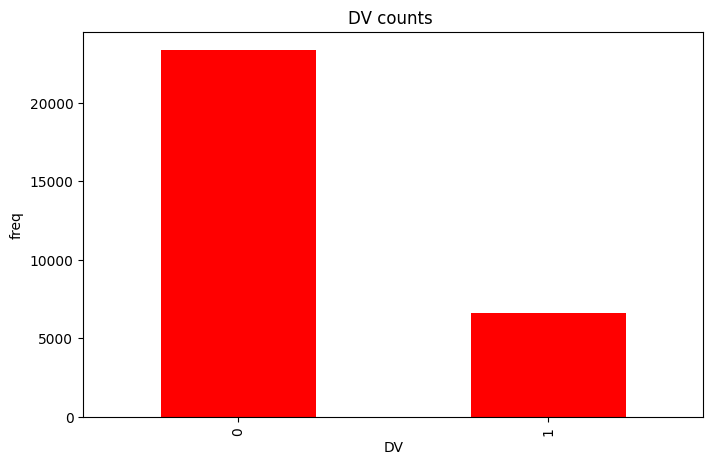

In [ ]:
#Ploting the unique value count of each variable in discreat category.
for col in dis_var:
  counts=df[col].value_counts().sort_index()
  fig=plt.figure(figsize=(8,5))
  ax=fig.gca()
  counts.plot.bar(ax=ax,color='red')
  plt.title(col + " counts ")
  plt.xlabel(col)
  plt.ylabel("freq")
plt.show()

In [ ]:
#description of discrete variable of data
df[dis_var].describe()

,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,DV
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,0.221200
std,0.489129,0.790349,0.521970,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,0.415062
min,1.000000,0.000000,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000
25%,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,6.000000,3.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1.000000


We dont have negative value for Sex , Education and Marriage and no outliers seems so. For payment 1 to 6 have negative value as minimum and still no outliers.

#### Ploting Distribution for Cont_var

<Figure size 800x800 with 0 Axes>

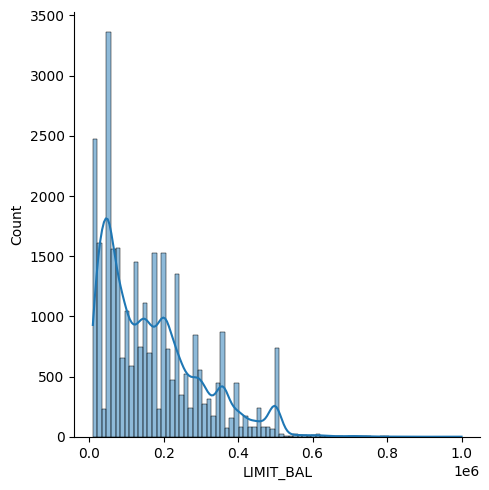

<Figure size 800x800 with 0 Axes>

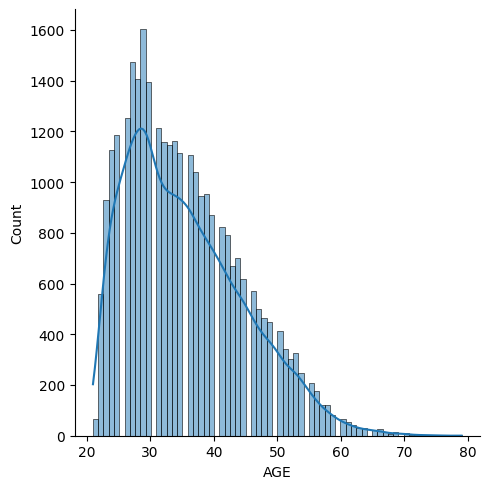

<Figure size 800x800 with 0 Axes>

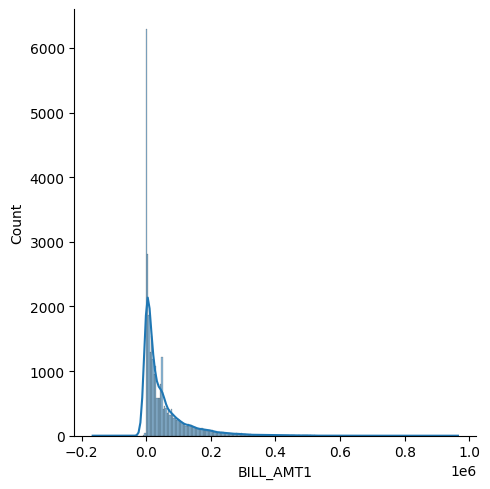

<Figure size 800x800 with 0 Axes>

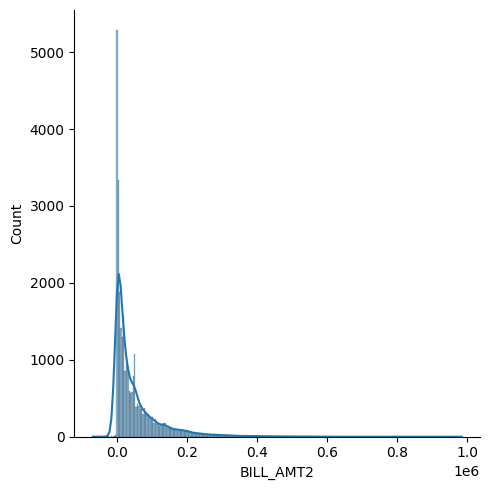

<Figure size 800x800 with 0 Axes>

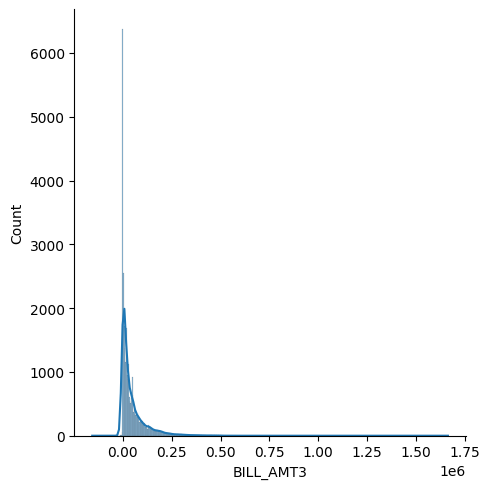

<Figure size 800x800 with 0 Axes>

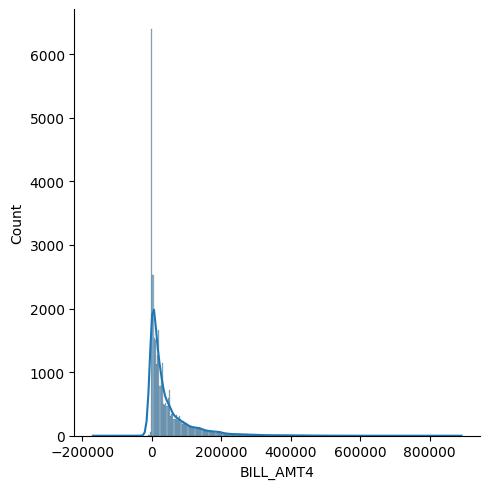

<Figure size 800x800 with 0 Axes>

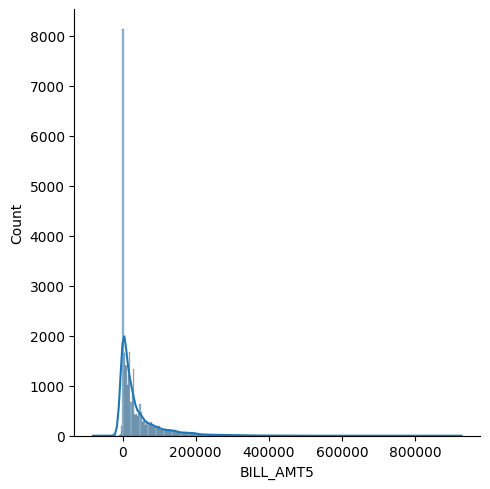

<Figure size 800x800 with 0 Axes>

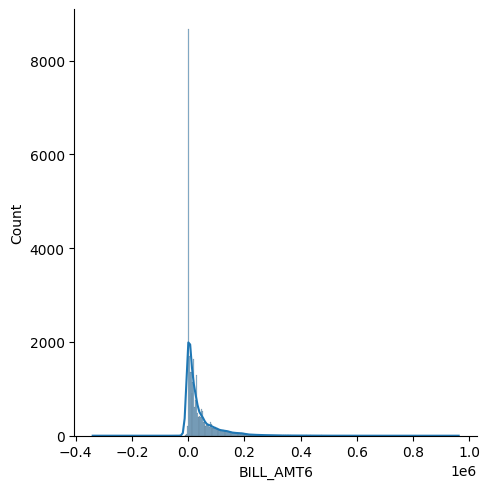

<Figure size 800x800 with 0 Axes>

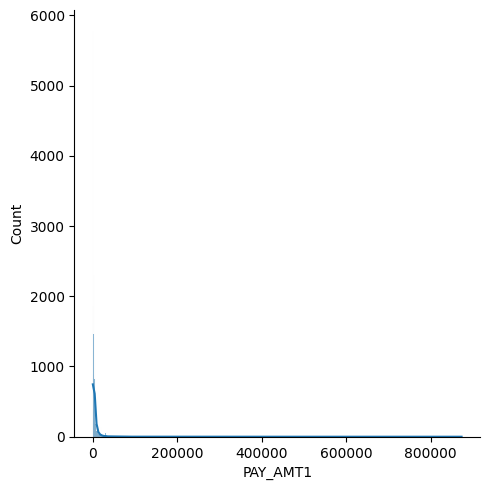

<Figure size 800x800 with 0 Axes>

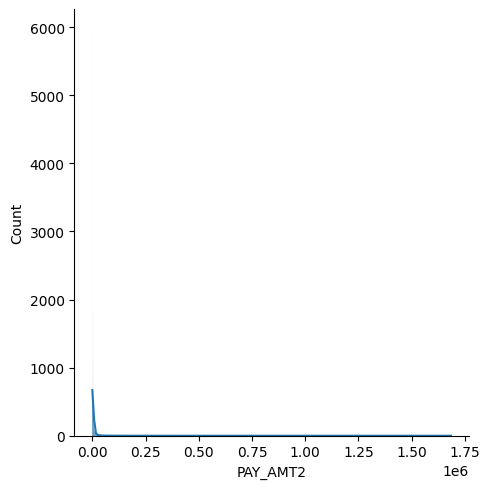

<Figure size 800x800 with 0 Axes>

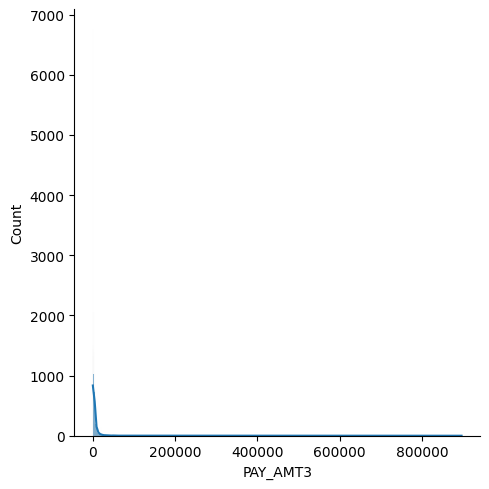

<Figure size 800x800 with 0 Axes>

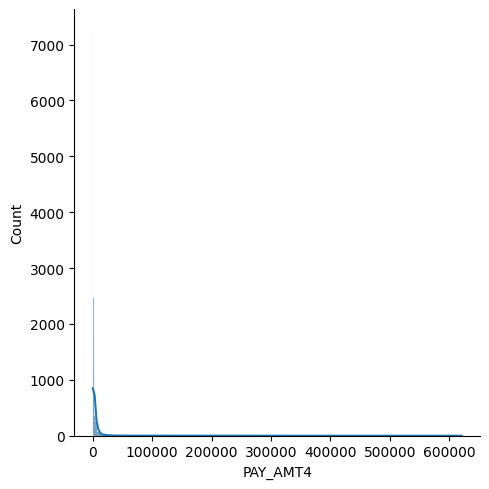

<Figure size 800x800 with 0 Axes>

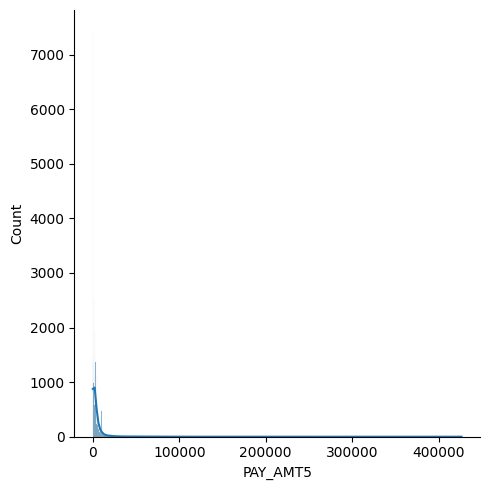

<Figure size 800x800 with 0 Axes>

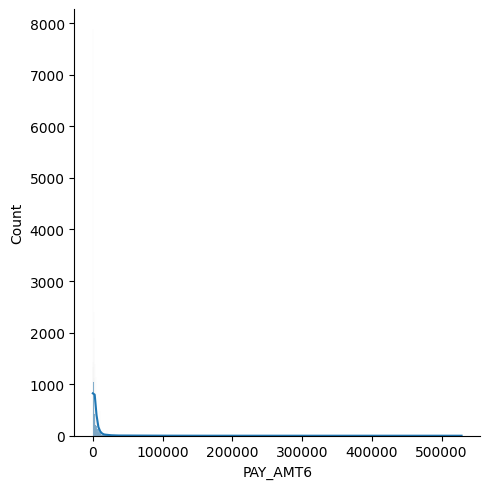

In [ ]:
# Ploting the distribution of Continuous Features
for col in cont_var:
  plt.figure(figsize=(8,8))
  sns.displot(data=df[col], kde=True)


**Except the Age Variable We have all Variable right skewed . Limit Credit is somewhat normal but other variable of Bill amount 6 variable and Pay amount 6 variable are Highly right skewed . Bill amount is little bit negative skewed also . We need to tranform the Data to make it normal.**

In [ ]:
#describe the continuous variable
df[cont_var].describe([.90,.99])

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
90%,360000.000000,49.000000,142133.700000,136905.500000,1.320513e+05,122418.700000,115883.000000,112110.400000,10300.000000,1.040110e+04,10000.00000,9570.600000,9500.000000,9600.000000
99%,500000.000000,60.000000,350110.680000,337495.280000,3.250304e+05,304997.270000,285868.330000,279505.060000,66522.180000,7.665102e+04,70000.00000,67054.440000,65607.560000,82619.050000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


Bill amt Feature 1 to 6 have negative values but not that much outliers . Pay_amt 1 to 6 Feature have Zero as minimum but we have Maximum value very high . We have outlier in Pay_amt 1 to 6 Features.

## ***Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Default percent  over Gender

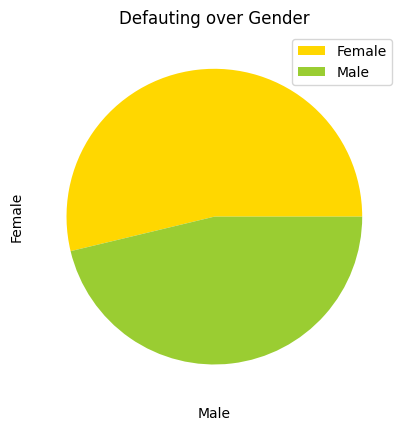

In [ ]:
# Defaulting Percent over Gender
plt.pie(dfn.groupby("SEX")["DV"].sum()/dfn.groupby("SEX")['SEX'].value_counts(),colors=['Gold','yellowgreen'])
plt.title("Defauting over Gender")
plt.ylabel("Female")
plt.xlabel("Male")
plt.legend(['Female','Male'], loc="best")

In this chart I have ploted the distribution  of Defaulting percentage over Gender . We can see Female have more inclination towards Defaulting acording to Dataset . Yellow area Shows percentage of Female Defaulting which is more than 50 percent.

#### Distribution of credit over Gender

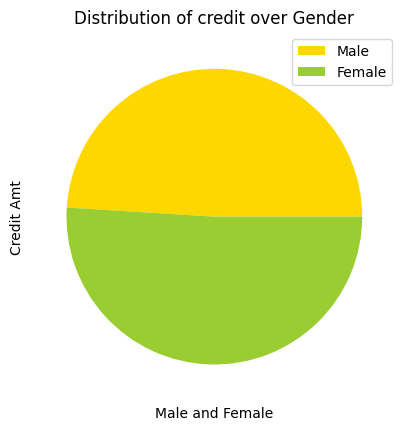

In [ ]:
#Distribution of credit over Gender
plt.pie(dfn.groupby("SEX")["LIMIT_BAL"].sum()/dfn["SEX"].value_counts(),colors=['Gold','yellowgreen'])
plt.title("Distribution of credit over Gender")
plt.xlabel("Male and Female")
plt.ylabel("Credit Amt")
plt.legend(labels=('Male','Female'))

We can see that Green area is slightly more than 50 percent which represent Credit Limit for Female per count. We can see Female have more credit limit per person than Man .

#### No. of Default over Increase in Age

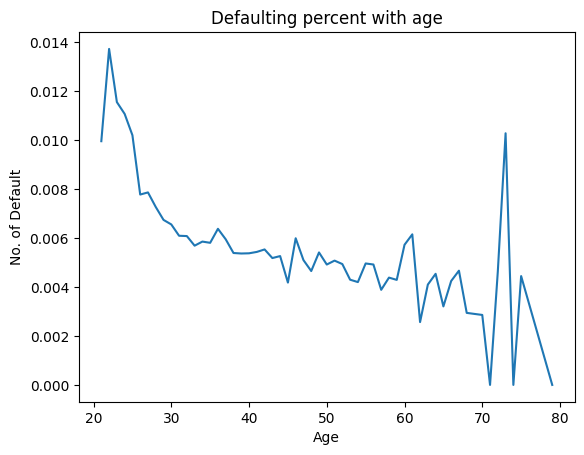

In [ ]:
# Defaulting with different Age
plt.plot(dfn.groupby('AGE')['DV'].sum()/dfn.groupby('AGE')['AGE'].sum())
plt.title("Defaulting percent with age")
plt.xlabel("Age")
plt.ylabel("No. of Default")
plt.show()

Our Age Distribution is 20 to 79 and with increase in Age No of Default Case Decrease overall but there are sharp peaks  which indicate some abnormality at different age.

#### Percent of Default over Education

Text(0, 0.5, 'Percent of people')

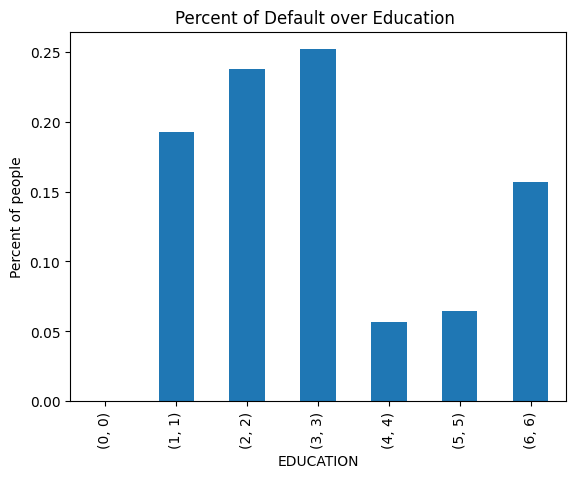

In [ ]:
(dfn.groupby(["EDUCATION"])["DV"].sum()/dfn.groupby(['EDUCATION'])['EDUCATION'].value_counts()).plot(kind='bar')
plt.title("Percent of Default over Education ")
plt.xlabel("EDUCATION")
plt.ylabel("Percent of people")

Here we have ploted the percent of Default over the defferent education . we can ovserve that initially Default percent increase but later on there is sharp decrease in Default percent .

#### Distribution of Past Payment

Text(-3.6805555555555554, 0.5, 'No. of Person')

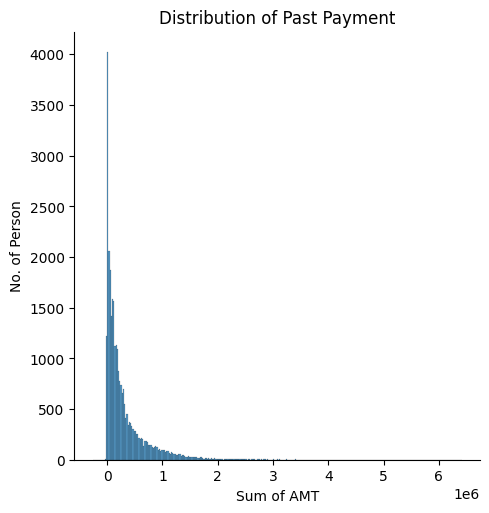

In [ ]:
#Distribution of past payment and bill amount
bill=['BILL_AMT1',	'BILL_AMT2',	'BILL_AMT3',	'BILL_AMT4',	'BILL_AMT5',	'BILL_AMT6',	'PAY_AMT1',	'PAY_AMT2',	'PAY_AMT3',	'PAY_AMT4',	'PAY_AMT5',	'PAY_AMT6']
sns.displot(dfn[bill].sum(axis=1))
plt.title("Distribution of Past Payment")
plt.xlabel("Sum of AMT")
plt.ylabel("No. of Person")

Here we calculated sum of past bill and payment for each customer and ploted distribution of that. plot is right skewed.

####  Correlation Heatmap

<Axes: >

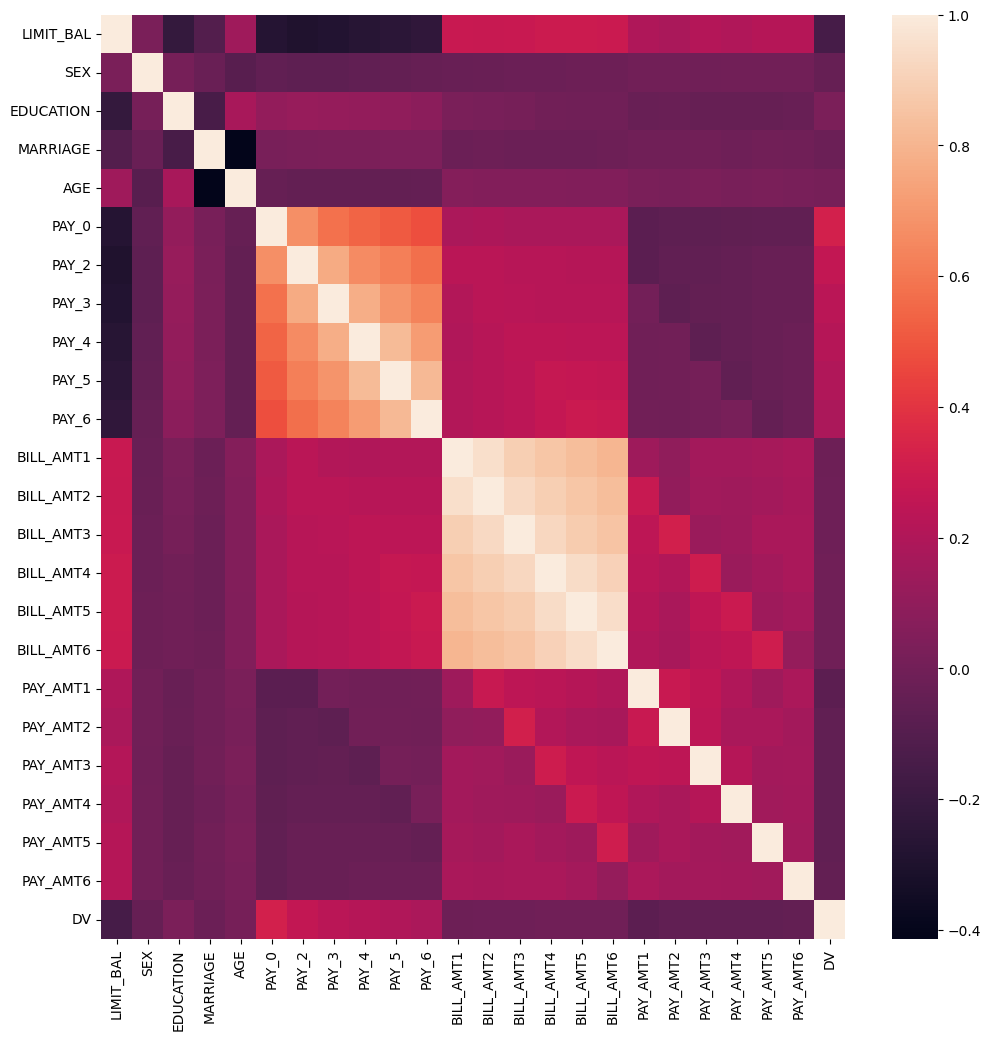

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12,12))
sns.heatmap(dfn.corr())

**Here We have ploted the Correaltion Heatmap . How differnt Feature are correlated with each other We can see that Most of Feature are not correlated with each other but some of them are like bill amount Feature 1 to 6 are Highly correlated with each other . We can take sum of all these Feature to reduce the dimension of Feature variable.**

## ***Feature Engineering & Data Pre-processing***

### Handling Outliers

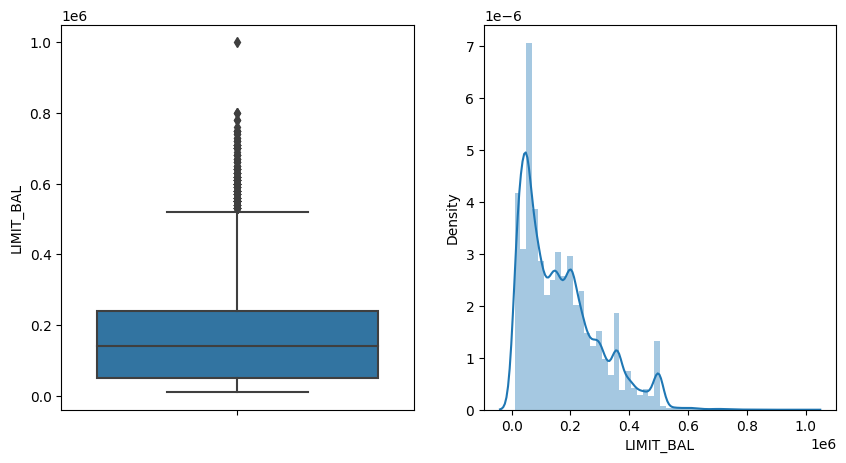

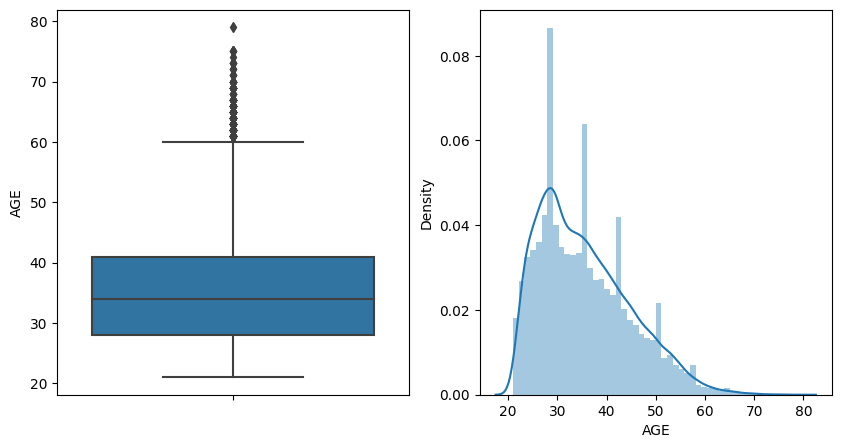

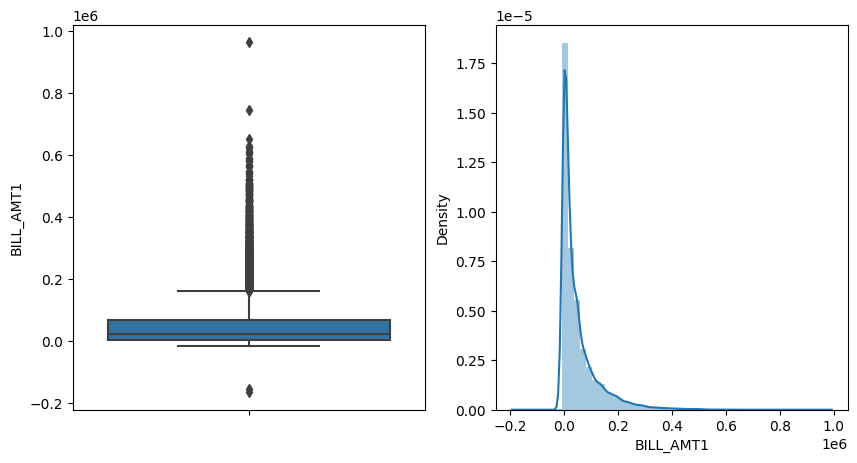

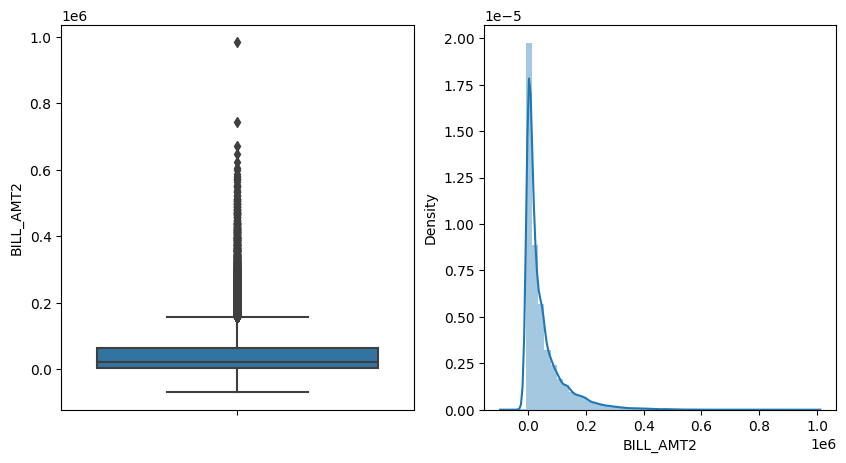

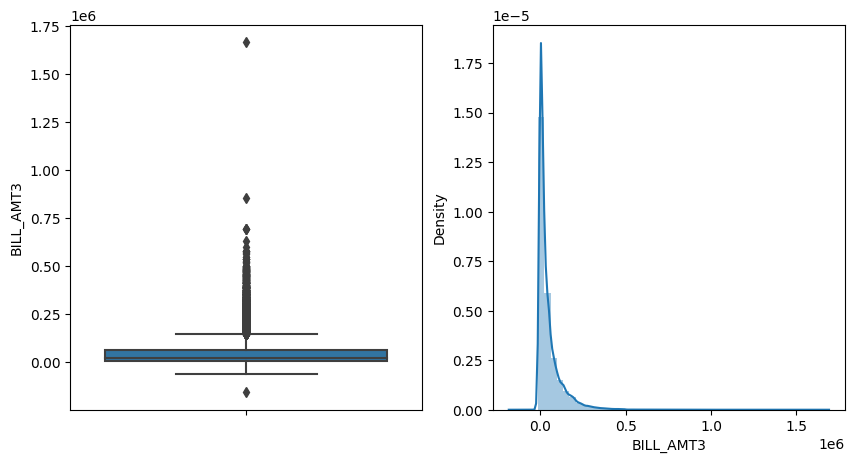

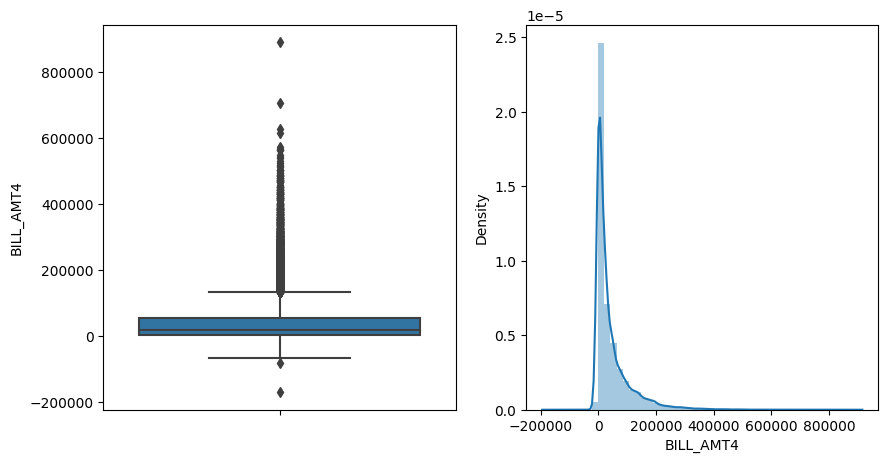

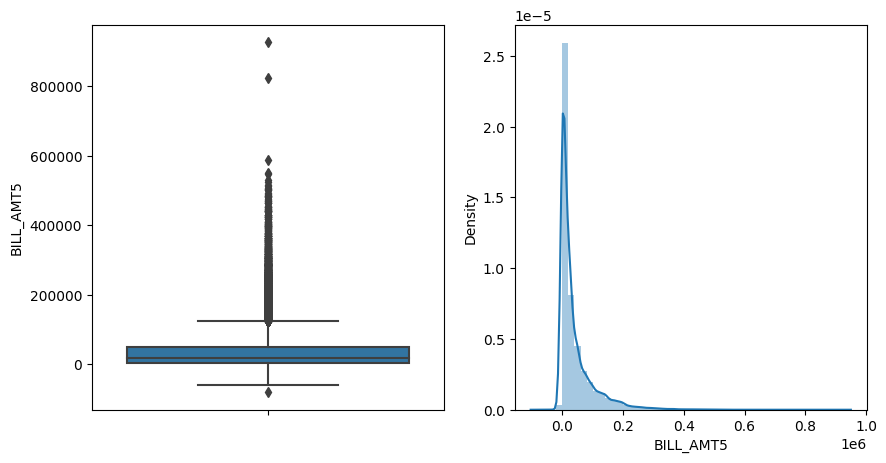

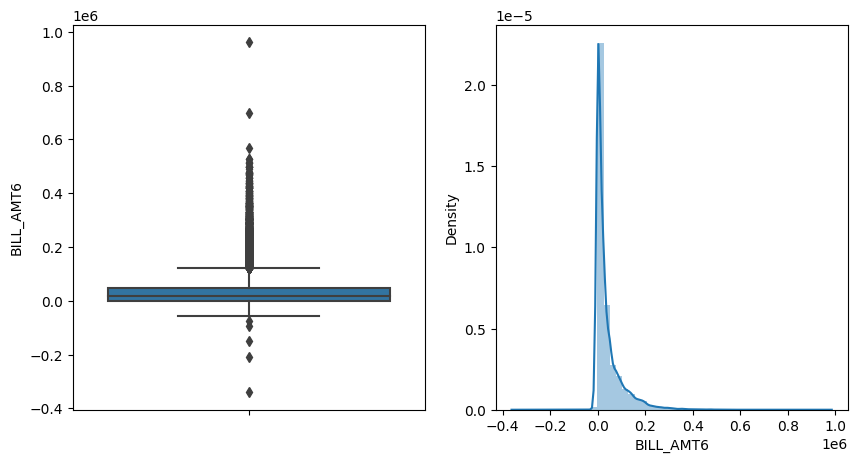

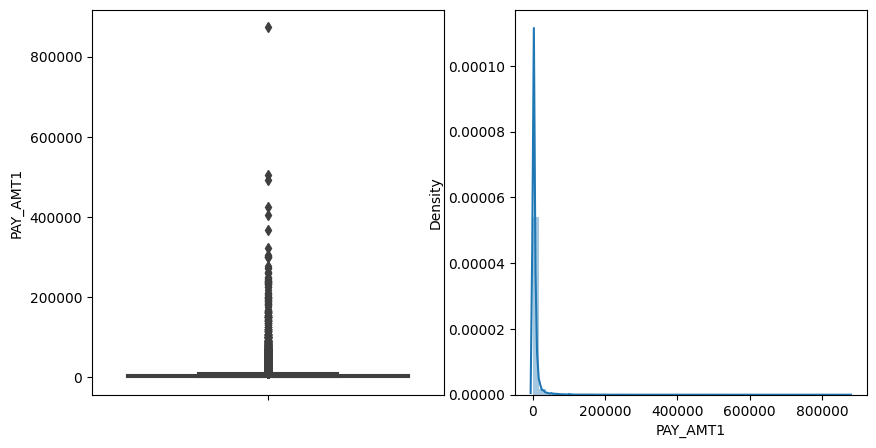

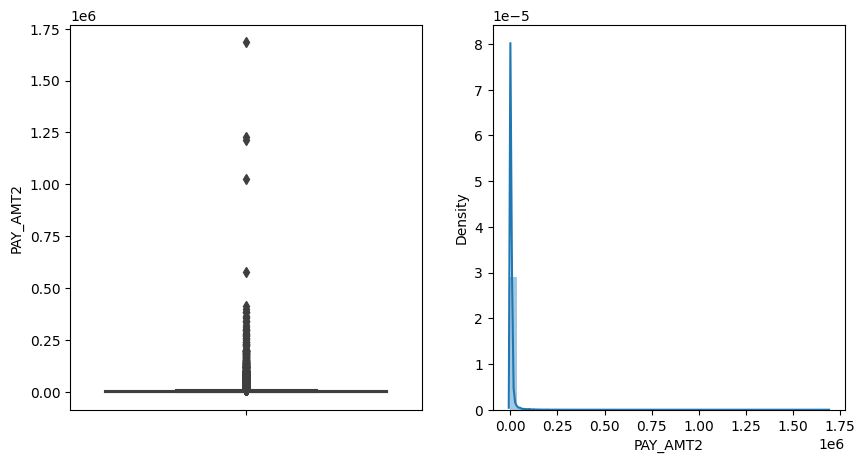

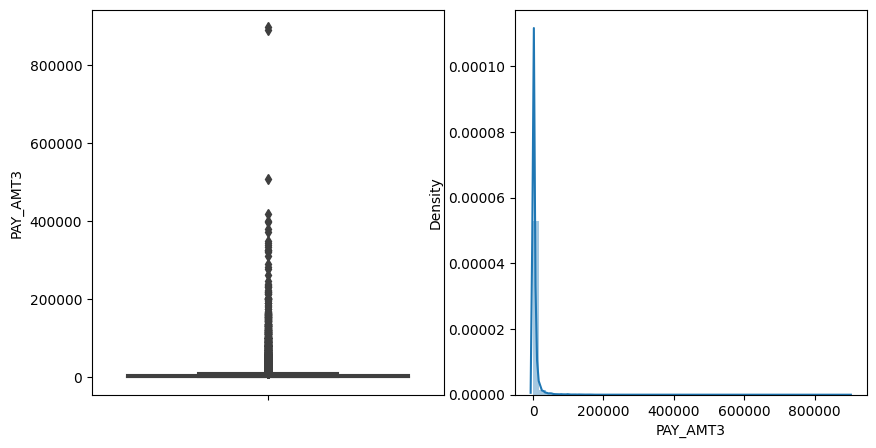

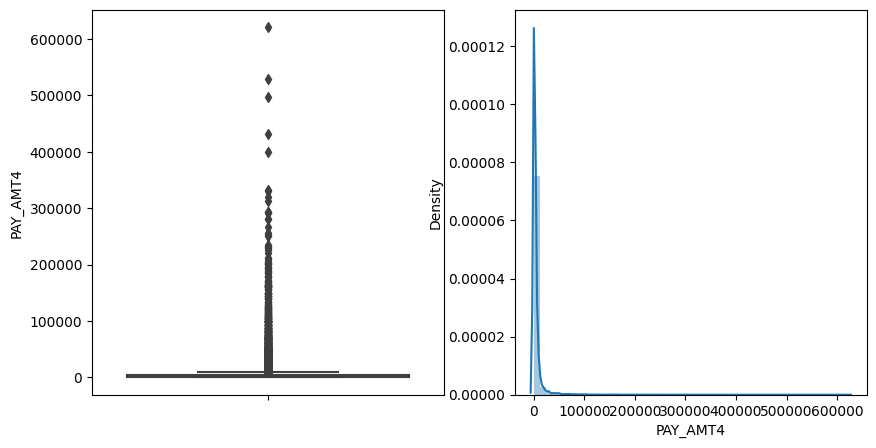

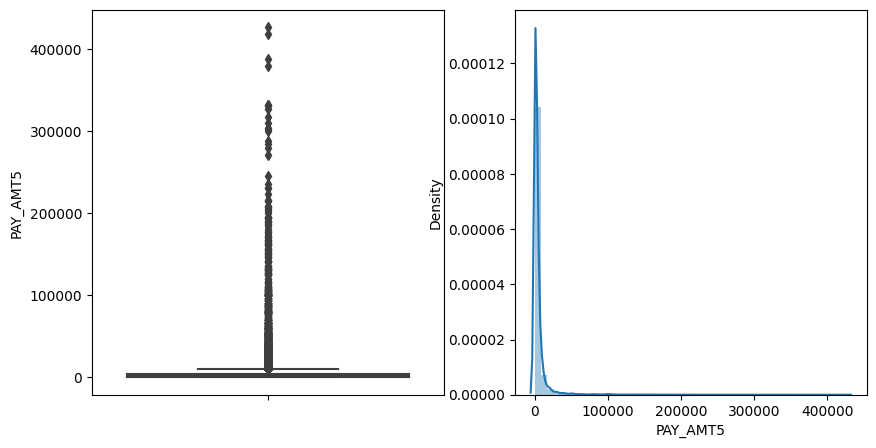

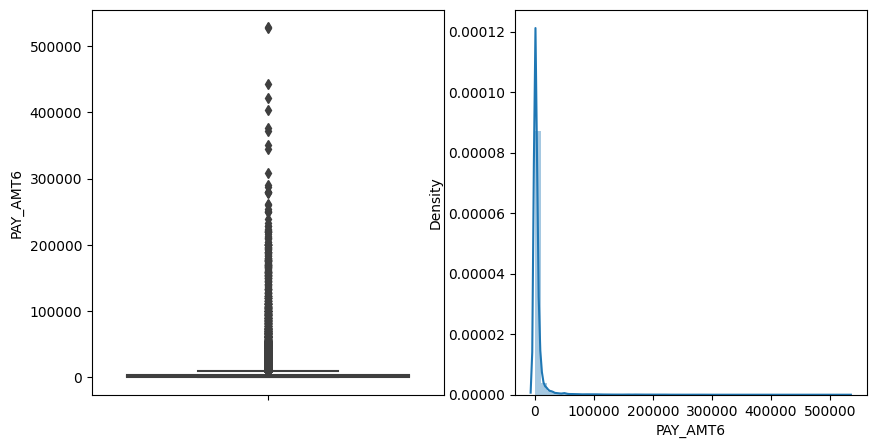

In [ ]:
#Ploting the outlier in continuous variable with the distribution of each Feature of continuous nature.
import warnings
warnings.filterwarnings('ignore')
for var in cont_var:
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=dfn[var])
    fig.set_title('')
    fig.set_ylabel(var)
    plt.subplot(1, 2, 2)
    fig = sns.distplot(dfn[var])
    plt.show()

Outliers can be visualised as the dots outside the whiskers in the boxplots. The majority of the continuous variables seem to contain outliers. In addition, the majority of the variables are not normally distributed. If we are planning to build linear regression, we should tackle these to improve the model performance.

#####***Using the Isolation Forest for the Outlier Detection***

In [ ]:
clf = IsolationForest(n_estimators=100, contamination=0.01, random_state=0)
clf.fit(dfn[cont_var])

# predict raw anomaly score
dfn['multivariate_anomaly_score'] = clf.decision_function(dfn[cont_var])

# prediction of a datapoint category outlier or inlier
dfn['multivariate_outlier'] = clf.predict(dfn[cont_var])

In [ ]:
# prediction of a datapoint category outlier or inlier
dfn['multivariate_outlier'].value_counts()

 1    29665
-1      300
Name: multivariate_outlier, dtype: int64

In [ ]:
#We found 300 outliear which we are going to take care
dfn=dfn[dfn['multivariate_outlier']==1]


In [ ]:
dfn.drop(columns=["multivariate_outlier","multivariate_anomaly_score"],axis=1,inplace=True)

##### What all outlier treatment techniques have you used and why did you use those techniques?

We have used Isolation Forest for anomaly detection. It is advance algorithum for anomaly detection and we can remove these data point which are anomaly afterwards. Here we could have used capping or filling outlier with mean value . These are basic techinique for outlier treatment . Instead I have chossen tree based algorithum for anomaly detection because one value seems outlier acording to one Feature but if we consider all dataset it might not be the outlier that is why we have used the Isolation Forest .

###Discrete Feature Encoding

In [ ]:
# Encoding discrete  columns
onehotencoder = OneHotEncoder()
for col in dis_var[:-1]:

  one_hot_Foundation = onehotencoder.fit_transform(np.array(dfn[col]).reshape(-1,1)).toarray()
  columns=[]
  for i in range(len(dfn[col].unique())):
    columns.append(col+str(i))
  one_hot_df = pd.DataFrame(one_hot_Foundation,index=dfn.index,columns=columns)
  dfn = pd.concat([dfn,one_hot_df],axis=1)


In [ ]:
#droping the Not required columns
dfn.drop(columns=dis_var[:-1],axis=1,inplace=True)

#### What all categorical encoding techniques have you used & why did you use those techniques?

I have used OneHotEncoder of sklearn for encoding the discrete Feature .This will drives all the unique value as Feature in Dataset. We had initially 24 Feature which is now increased to 91 after encoding .

###Data Transformation

In [ ]:
# Getting symmetric and skew symmetric features from the columns
symmetric_feature=[]
non_symmetric_feature=[]
for col in cont_var:
  if abs(dfn[col].mean()-dfn[col].median())<0.1:
    symmetric_feature.append(col)
  else:
    non_symmetric_feature.append(col)
# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)
# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - []
Skew Symmetric Distributed Features : - ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


In [ ]:
#Seperation of Feature according to value they consist
var_1=[]
var_2=[]
for col in cont_var:
  if dfn[col].min()<0:
    var_1.append(col)
  else:
    var_2.append(col)

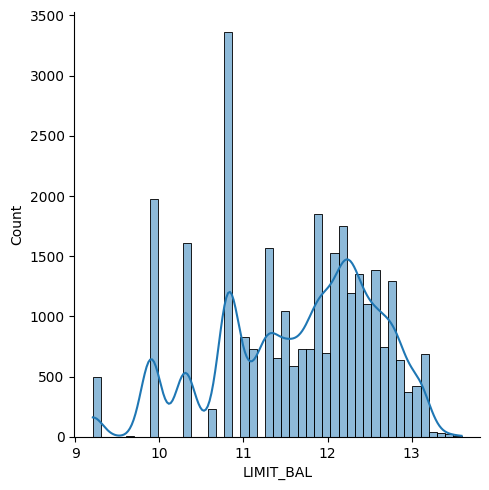

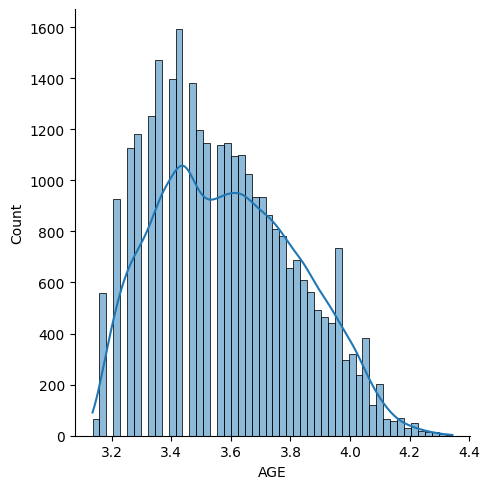

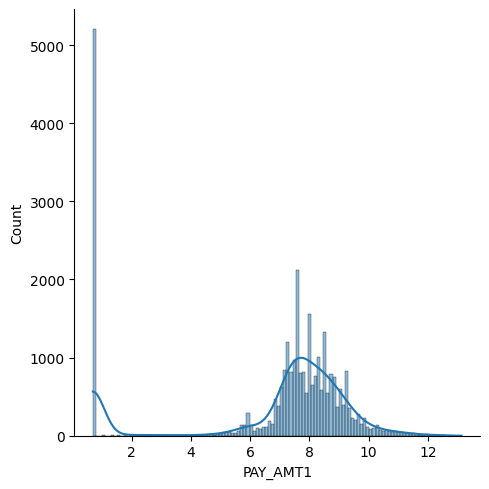

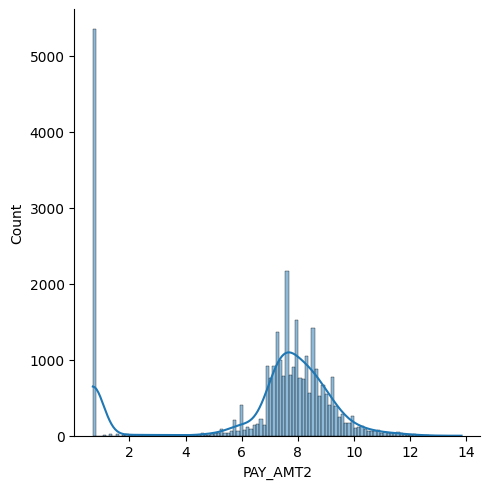

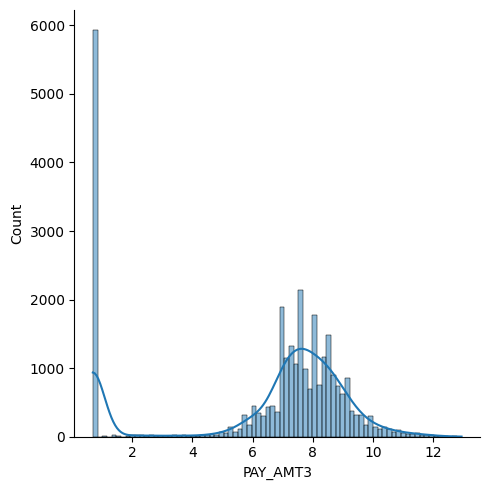

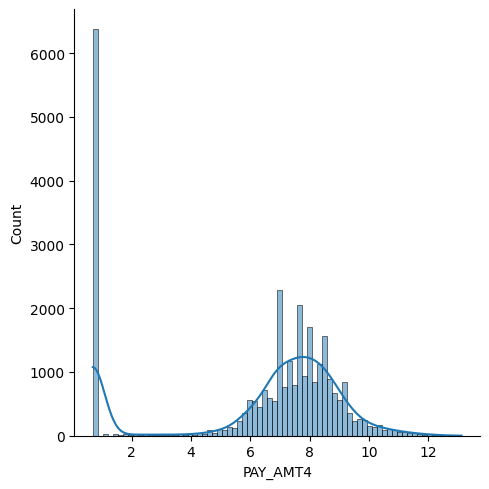

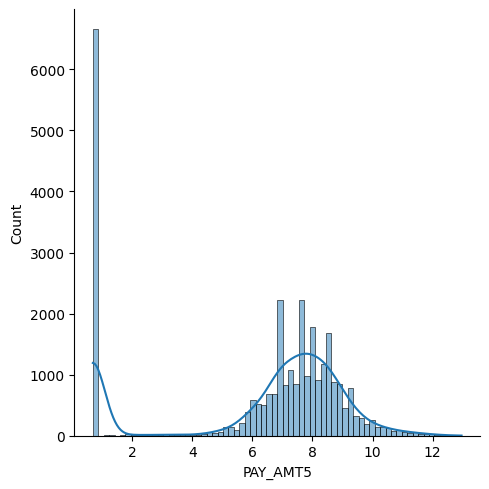

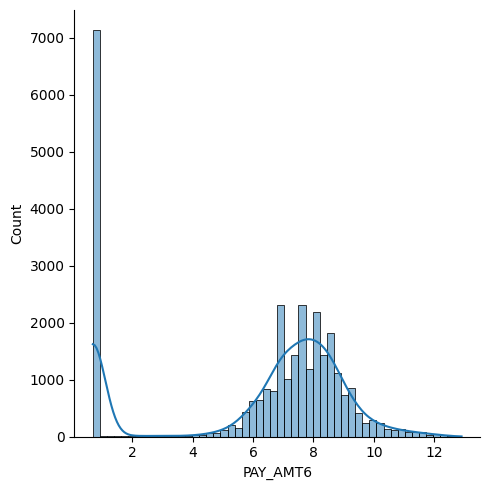

In [ ]:
for col in var_2:
  dfn[col] = (dfn[col]+1).transform(np.log1p)
  sns.displot(dfn[col],kde=True)


In var_2 We have only those Feature which have zero and positive value . This Seperation was required because we have differnt Transformation for these . Like we can apply Log Transformation for this as Feature are Highly skewed . But if we apply Log Transformation for those Feature which have zero and Neagative value . If we apply Log Transformation on zero it gives infinity then we have to apply Log1P function which adds one to each value before transformation. but for Feature which have Neagative value if we add one to it which makes it zero again . So we need to apply some other transformation to it.

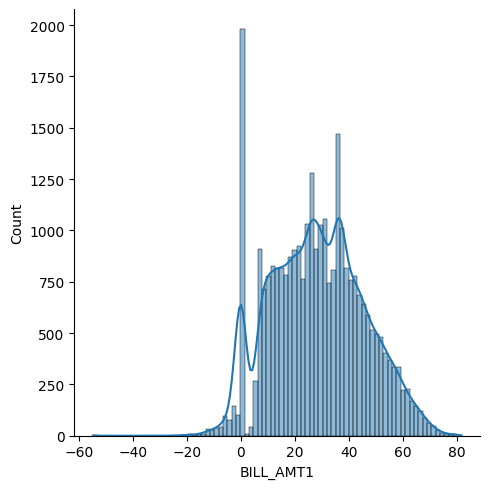

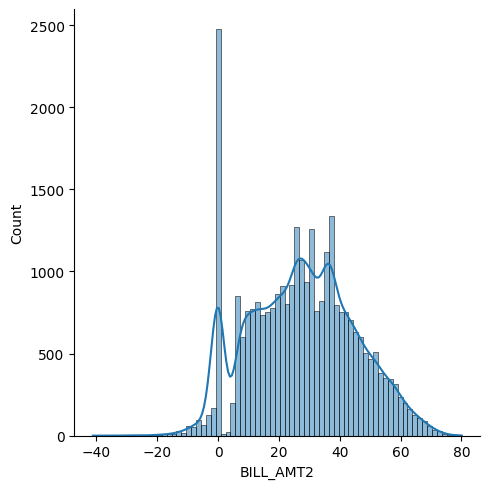

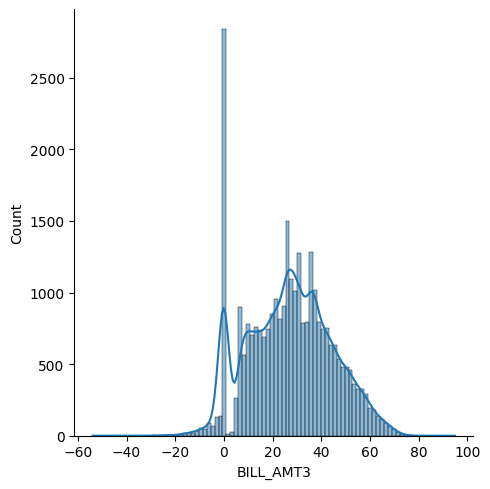

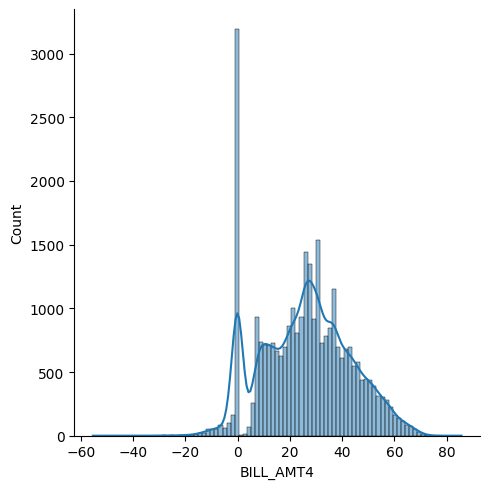

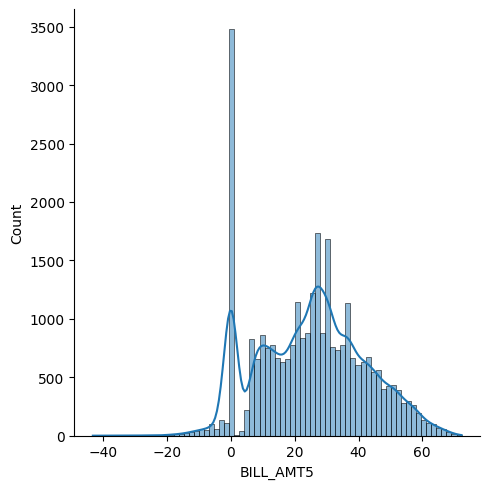

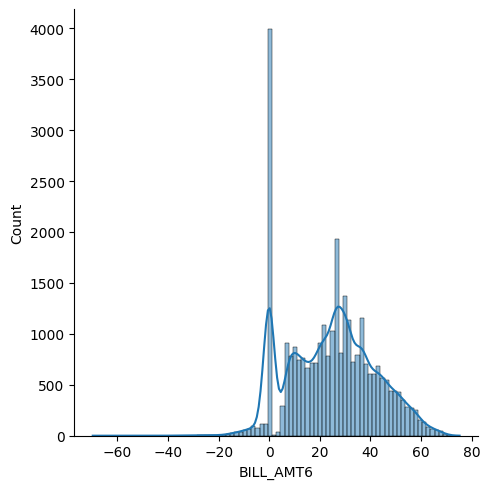

In [ ]:
#Feature which have negative value in it.
for col in var_1:
  dfn[col] = (dfn[col]).transform(np.cbrt)
  sns.displot(dfn[col],kde=True)


For Feature in Var_1 we Have applied cuberoot Transformation because we cannot apply Log Transformation to it as it have zero and negative value to it.

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes Data is highly skewed and we need to transform it before training the model on it . We have applied Log10 Transformation on var_2 and Cuberoot on Feature of Var_1 because in var_2 we dont have negative value and Log1p Transformation can be applied while var_1 we have negative value so we cannot apply log1p so we have to apply cuberoot Transformation to it. We can see that after transformation we have mostly Normally distributed values.

###Data Scaling

In [ ]:
#MinMax scaler for scaling the value
minmax = MinMaxScaler(feature_range=(0, 1))
dfn[cont_var] = minmax.fit_transform(dfn[cont_var])

We have applied MinMax scaling to Scale all contiunuous feature from 0 to 1 .

###Dimesionality Reduction

In [ ]:
dfn.shape

(29665, 92)

In [ ]:
pca = PCA(n_components=91)
X=dfn.drop(['DV'],axis=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (29665, 91)
transformed shape: (29665, 91)


In [ ]:
X_pca=pd.DataFrame(X_pca)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

If we have more no of Feature and large dataset there we need to reduce Dimention so that we can train model in less time . Here we have used Principal Component analysis for Dimentionlity Reduction . In PCA we project component of dataset on eigen vector which best capture variation of dataset. Here we dont have that much Feature and that is why we are taking all the Feature.

###Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_pca,dfn["DV"],test_size=0.2,stratify=dfn["DV"])

##### What data splitting ratio have you used and why?

We have taken test size as 20 percent . We have stratified the Dependent Variable so that to get same no. of binery output in each Train and Test Dataset.

###Handling Imbalanced Dataset

In [ ]:
#ploting Dependent Variable count
dfn.groupby(['DV'])['DV'].value_counts()

DV  DV
0   0     23335
1   1      6630
Name: DV, dtype: int64

We can see that only 6630 count of 1 are there for 23335 count of 0 . our data is imbalanced . If we train our model on this dataset and we only predict 0 than we get a very high accuracy which is misleading and our purpose is to predict the default payment.

In [ ]:
# Using SMOTE algorithm for Handeling Imbalanced Dataset.
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x_train,y_train)

print('Original dataset shape', len(x_train))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 23732
Resampled dataset shape 36950


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

We have used Synthetic Minority Oversampling Technique for generating the minority class. we do synthesize  data of minority class between choosen point and its neighbour till our data is balanced.

## ***7. ML Model Implementation***

In [ ]:
#Intialization Different ML model for classification
#Logistic Regression
lr = LogisticRegression()
#Random Forest Classifier
rf = RandomForestClassifier()
#XGBOOST Classifier
xgb = XGBClassifier(objective= 'binary:logistic', nthread=4, seed=42)
#Support Vector Machine Classifier
svc = svm.SVC()

In [ ]:
#Hyperparameter For Logestic Regression
aram_dict_lr = {
    'C' : [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1e-3,1e+4,1e+5,1e+6]
}
#Hyperparameter For Random Forest
param_dict_rf = {
    'max_depth': [4, 6, 8],
    'min_samples_leaf': [40, 50],
    'min_samples_split': [50, 100, 150],
    'n_estimators': [50, 80, 100]
  }
#Hyperparameter For XGBOOST Classifier
param_dict_xgb = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.05, 0.01, 0.005]
  }
#Hyperparameter For SVM Classifer
param_dict_svm = {'C': [0.1, 1, 10, 1000],
              'gamma': [1, 0.1, 0.01, 0.0001],
              'kernel': ['rbf','linear','poly']}
# List of Best Parameter for ML Models Choosen after Hyperparameter Tunning
"""
lr_best_para={'C':[ 0.001]}
rf_best_para={'max_depth': [8],
 'min_samples_leaf': [40],
 'min_samples_split': [50],
 'n_estimators': [100]}
xgb_best_para={'learning_rate':[0.1],
               'max_depth': [9],
               'n_estimators': [180]}
svm_best_para={'C': [10],
              'gamma': [1],
              'kernel': ['rbf']}
"""

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

### Logestic Regression

In [ ]:
# Using GridSearch for Hyperparameter tunning of Logistic Regression
lr_grid = GridSearchCV(estimator=lr,
                       param_grid = lr_best_para,
                       cv = 5, verbose=2, scoring='roc_auc')

lr_grid.fit(x_smote, y_smote)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ............................................C=0.001; total time=   0.2s
[CV] END ............................................C=0.001; total time=   0.2s
[CV] END ............................................C=0.001; total time=   0.2s
[CV] END ............................................C=0.001; total time=   0.2s
[CV] END ............................................C=0.001; total time=   0.2s


GridSearchCV(cv=5, estimator=LogisticRegression(), param_grid={'C': [0.001]},
             scoring='roc_auc', verbose=2)

**For Logestic Regression classifier, the best estimator so far is**

In [ ]:
lr_model = lr_grid.best_estimator_

Logistic regression is a classification algorithm that predicts the probability of Classification outcome. A logistic regression produces a logistic curve, which is limited to values between 0 and 1. Logistic regression models the probability that each input belongs to a particular category.
Logistic regression is an excellent tool to know for classification problems, which are problems where the output value that we wish to predict only takes on only a small number of discrete values. Here we'll focus on the binary classification problem, where the output can take on only two distinct classes.

### Random Forest Classifier

In [ ]:
# Using GridSearch for Hyperparameter tunning
rf_grid = GridSearchCV(estimator=rf,
                       param_grid = rf_best_para,
                       cv = 5, verbose=2, scoring='roc_auc')

rf_grid.fit(x_smote, y_smote)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=  25.1s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=  20.7s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=  20.0s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=  21.5s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=  20.7s


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8], 'min_samples_leaf': [40],
                         'min_samples_split': [50], 'n_estimators': [100]},
             scoring='roc_auc', verbose=2)

**For Random forest classifier, the best estimator so far is**

In [ ]:
rf_model = rf_grid.best_estimator_

In Random Forest, we grow multiple trees .
We construct trees from the subsets of the original dataset. These subsets can have a fraction of the columns as well as rows.
To classify a new object based on attributes, each tree gives a classification and we say that the tree “votes” for that class.
The forest chooses the classification having the most votes.It surely does a good job at classification but it doesn’t predict beyond the range in the training data, and that they may over-fit data sets that are particularly noisy.

### XG Boost Classifier

In [ ]:
# Using GridSearch for Hyperparameter tunning
xgb_grid = GridSearchCV(estimator=xgb,
                       param_grid = xgb_best_para,
                       cv = 5, verbose=2, scoring='roc_auc')

xgb_grid.fit(x_smote, y_smote)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END ...learning_rate=0.1, max_depth=9, n_estimators=180; total time= 3.5min
[CV] END ...learning_rate=0.1, max_depth=9, n_estimators=180; total time= 3.0min
[CV] END ...learning_rate=0.1, max_depth=9, n_estimators=180; total time= 3.0min
[CV] END ...learning_rate=0.1, max_depth=9, n_estimators=180; total time= 3.1min
[CV] END ...learning_rate=0.1, max_depth=9, n_estimators=180; total time= 3.0min


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             param_grid={'learning_rate': [0.1], 'max_depth': [9],
                         'n_estimators': [180]},
             scoring='roc_auc', verbose=2)

**For XGB classifier, the best estimator so far is**

In [ ]:
xgb_model = xgb_grid.best_estimator_

Boosting fit a sequence of weak learners − models that are only slightly better than random guessing, such as small decision trees − to weighted versions of the data. More weight is given to examples that were misclassified by earlier rounds.

Gradient Boosting Machine (GBM) builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

Extreme Gradient Boosting (XGBoost) is just an extension of gradient boosting. Standard GBM implementation has no regularization like XGBoost, therefore it also helps to reduce overfitting. In fact, XGBoost is also known as ‘regularized boosting‘ technique.XGBoost implements parallel processing and is blazingly faster as compared to GBM.




###SVM Classifier

In [ ]:
# Using GridSearch for Hyperparameter tunning
svm_grid = GridSearchCV(estimator=svc,
                       param_grid = svm_best_para, n_jobs=2,
                       cv = 5, verbose=2, scoring='roc_auc')

In [ ]:
svm_grid.fit(x_smote, y_smote)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=2,
             param_grid={'C': [10], 'gamma': [1], 'kernel': ['rbf']},
             scoring='roc_auc', verbose=2)

**For SVM classifier, the best estimator so far is**

In [ ]:
svm_model = svm_grid.best_estimator_

Support Vector Machines (SVMs in short) are machine learning algorithms that are used for classification and regression purposes. SVMs are one of the powerful machine learning algorithms for classification, regression and outlier detection purposes. An SVM classifier builds a model that assigns new data points to one of the given categories. Thus, it can be viewed as a non-probabilistic binary linear classifier.
SVMs can be used for linear classification purposes. In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using the kernel trick. It enable us to implicitly map the inputs into high dimensional feature spaces.
our simple intuition of "drawing a line between classes" is not enough, and we need to think a bit deeper.Support vector machines offer one way to improve on this.The intuition is this: rather than simply drawing a zero-width line between the classes, we can draw around each line a margin of some width, up to the nearest point.


**Lets collect all our best models !**

In [ ]:
# collecting all the best Models
models = [lr_model, rf_model, xgb_model, svm_model]

In [ ]:
#Score of Evaluation metric for all model is added to Dataframe
def model_metric(models,X_train, X_test, y_train, y_test):

  cols = ['Train accuracy', 'Test accuracy', 'Train precision', 'Test precision', 'Train recall', 'Test recall',
          'Train f1 score', 'Test f1 score', 'Train ROC-AUC', 'Test ROC-AUC']
  model_df = pd.DataFrame(columns=cols)
  conf_train, conf_test = {}, {}

  i = 0
  for model in models:

    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    model_df.loc[i,'Train accuracy'] = accuracy_score(y_train, y_pred_train).round(2)
    model_df.loc[i,'Test accuracy'] = accuracy_score( y_test, y_pred_test).round(2)
    model_df.loc[i,'Train precision'] = precision_score(y_train, y_pred_train).round(2)
    model_df.loc[i,'Test precision'] = precision_score( y_test, y_pred_test).round(2)
    model_df.loc[i,'Train recall'] = recall_score(y_train, y_pred_train).round(2)
    model_df.loc[i,'Test recall'] = recall_score(y_test, y_pred_test).round(2)
    model_df.loc[i,'Train f1 score'] = f1_score(y_train, y_pred_train).round(2)
    model_df.loc[i,'Test f1 score'] = f1_score(y_test, y_pred_test).round(2)
    model_df.loc[i,'Train ROC-AUC'] = roc_auc_score(y_train, y_pred_train).round(2)
    model_df.loc[i,'Test ROC-AUC'] = roc_auc_score( y_test, y_pred_test).round(2)
    model_df.loc[i,"Model"]=model.__class__.__name__

    conf_train[model.__class__.__name__ ] = confusion_matrix(y_train, y_pred_train)
    conf_test[model.__class__.__name__] = confusion_matrix(y_test, y_pred_test)

    i+=1

  return model_df, conf_train, conf_test

In [ ]:
model_df, conf_train, conf_test = model_metric(models,x_smote,x_test,y_smote,y_test)

In [ ]:
#Getting output score of all models
pd.set_option('display.max_columns', 15)
model_df.set_index("Model")

,Train accuracy,Test accuracy,Train precision,Test precision,Train recall,Test recall,Train f1 score,Test f1 score,Train ROC-AUC,Test ROC-AUC
Model,,,,,,,,,,
LogisticRegression,0.71,0.78,0.77,0.49,0.6,0.6,0.67,0.54,0.71,0.71
RandomForestClassifier,0.74,0.79,0.8,0.52,0.65,0.63,0.72,0.57,0.74,0.73
XGBClassifier,0.98,0.94,0.99,0.89,0.98,0.84,0.98,0.87,0.98,0.91
SVC,0.89,0.87,0.92,0.69,0.86,0.75,0.89,0.72,0.89,0.83


ACCURACY:
It does not consider the rate of false positives (non-default credits cards that were predicted as default) and false negatives (default credit cards that were incorrectly predicted as non-default). Both cases have negative impact on the bank, since false positives leads to unsatisfied customers and false negatives leads to financial loss.

RECALL:
The recall of a model is the ratio TP / (TP + FN). In this case, it is the ability of the classifier to find all the positive class. Recall is a good metric to use when the cost associated with false negative (FN) is high. In this classification problem there is a high cost for the bank when a default credit card is predicted as non-default, since no actions can be taken. Thus, recall is one important metric to pay attention to.

In [ ]:
for key, value in conf_train.items():
  print(f'Confusion matrix for {key} for Train :\n{value}')

Confusion matrix for LogisticRegression for Train :
[[15240  3258]
 [ 7449 11049]]
Confusion matrix for RandomForestClassifier for Train :
[[15487  3011]
 [ 6467 12031]]
Confusion matrix for XGBClassifier for Train :
[[18306   192]
 [  374 18124]]
Confusion matrix for SVC for Train :
[[17105  1393]
 [ 2576 15922]]


In [ ]:
for key, value in conf_test.items():
  print(f'Confusion matrix for {key} for Test :\n{value}')

Confusion matrix for LogisticRegression for Test :
[[3822  803]
 [ 530  785]]
Confusion matrix for RandomForestClassifier for Test :
[[3866  759]
 [ 493  822]]
Confusion matrix for XGBClassifier for Test :
[[4485  140]
 [ 204 1111]]
Confusion matrix for SVC for Test :
[[4186  439]
 [ 327  988]]


True  Positive (TP):
A transaction is fraud and is detected as fraud by the model.

False Positive (FP):
A transaction is not fraud and is detected as fraud. This is also called a Type I error.

True Negative (TN):
A transaction is not fraud and is detected as not fraud.

False Negative (FN):
A transaction is fraud and is detected not fraud by the model. This is also called Type II error.

The confusion matrix provides a detailed overview of the classification. For a better performing model TP, TN must be high and FN, FP should be low as possible.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

We have to predict the Default Cases of Credit Card Payment. For accuracy we dont use false positive and false negative for scoring . For FP we predict Non Default as Default which is loss of Image to bank . For FN we predict Default as Non Default which make financial loss to bank . For using FP for scoring we calculate recall and F1 score for weighted sum of both.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We got nearly 71 accuracy for Linear Regression but if we check for recall and f1 score we got score of 60 and 54 which is quite low . Next is Random Forest we got accuracy of 80 but again for recall and f1 score we got score of 60 and 52 which is very less. For SVC we have 90 percent for accuracy and recall and f1 score 75 and 72 which is not that good. For XGBOOST we got accuracy of 94 and recall and f1 score are 84 and 87 which is best till now .

It is quite evident from the results that XGBoost is the best model that

can be used for the  dataset since all the performance metrics (accuracy, precision, recall and roc-auc score) show a higher value for the XGBoost model !

### K S Chart

In [ ]:
#Calculating the K S Chart for XGBOOST Model.
def ks(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob], 10)
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob]
    kstable['max_prob'] = grouped.max()[prob]
    kstable['events']   = grouped.sum()[target]
    kstable['nonevents'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['event_rate'] = (kstable.events / data[target].sum()).apply('{0:.2%}'.format)
    kstable['nonevent_rate'] = (kstable.nonevents / data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['cum_eventrate']=(kstable.events / data[target].sum()).cumsum()
    kstable['cum_noneventrate']=(kstable.nonevents / data['target0'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum_eventrate']-kstable['cum_noneventrate'], 3) * 100

    #Formating
    kstable['cum_eventrate']= kstable['cum_eventrate'].apply('{0:.2%}'.format)
    kstable['cum_noneventrate']= kstable['cum_noneventrate'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 9)
    print(kstable)

    #Display KS

    from colorama import Fore
    print(Fore.RED + "KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return(kstable)

In [ ]:
#Calculating the Probablity of class 1
dfn['YP']=xgb_model.predict_proba(X_pca)[:,1]

In [ ]:
#Ploting the KS Chart for XGBOOST Model
mydf = ks(data=dfn,target="DV", prob="YP")

        min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1       0.848062  0.994817    2861        109     43.50%         0.47%   
2       0.536822  0.848001    2485        485     37.78%         2.10%   
3       0.244858  0.536665     750       2220     11.40%         9.60%   
4       0.155816  0.244847     171       2799      2.60%        12.10%   
5       0.113416  0.155798     101       2869      1.54%        12.41%   
6       0.085475  0.113398      69       2901      1.05%        12.55%   
7       0.063561  0.085450      63       2907      0.96%        12.57%   
8       0.045514  0.063552      35       2935      0.53%        12.69%   
9       0.029445  0.045496      30       2940      0.46%        12.71%   
10      0.002357  0.029445      12       2958      0.18%        12.79%   

       cum_eventrate cum_noneventrate    KS  
Decile                                       
1             43.50

##KS is 80.5% at decile 3

KS Statistics

In data science, it compares the cumulative distribution of events and non-events and KS is where there is a maximum difference between the two distributions. In simple words, it helps us to understand how well our predictive model is able to discriminate between events and non-events.

# **Conclusion**

We have applied Logistic Regression where we use sigmoid function for classification between two classes. we got recall and F1 score .6 and .54 on Test Datta. Then we trained the Tree based model Random Forest which uses ensemble techinique for better presiction . Here we got recall .63 and f1 as .57 which is again very low for a model to deploy. Next we Trained SVC , one of the best for classification . SVC prediticed with score of recall and f1 as .75 and .72 . The Best prediction comes from XGBOOST which is a boosting algorithm . Where train learners on  weighted version of data with optimization of differintial loss function . It uses Regularization  to reduce overfitting . Parallel processing makes it Fast . With XGBOOST we got 84 and 87 as Recall and F1 Score .